##                                                    Projet AFD 

#   I- Introduction générale


L'obésité, avec ses conséquences physiques et mentales, est un enjeu de santé mondial avec des répercussions importantes. La fréquence de l'obésité est en constante augmentation, et il est donc essentiel de mener de nouvelles études afin d'analyser les éléments qui influencent l'obésité et de prédire l'apparition de cette condition en fonction de ces facteurs.

Ce jeu de données contient des informations pour estimer les niveaux d'obésité chez les individus en fonction de leurs habitudes alimentaires et de leur condition physique. Les données comprennent 17 colonnes et 2111 lignes, avec une variable de classe NObesity (Niveau d'obésité) qui permet de classer les données en utilisant les valeurs suivantes : Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II et Obesity Type III.

**Gender**: Feature, Categorical, "Genre"

**Age** : Feature, Continuous, "Age"

**Height**: Feature, Continuous "La taille"

**Weight**: Feature Continuous "Le poids"

**family_history_with_overweight**: Feature, Binary, " Est-ce que quelqu'un dans votre famille a une histoire d'obésité? "

**FAVC**: Feature, Binary, " Est-ce que vous mangez régulièrement des aliments riches en calories? "

**FCVC**: Feature, Integer, " Mangez vous normallement des légumes dans vos repas? "

**NCP**: Feature, Continuous, " Combien de repas principaux avez-vous par jour ? "

**CAEC** : Feature, Categorical, " Est-ce que vous mangez quelque chose entre les repas ? "

**SMOKE** : Feature, Binary, " Fumez-Vous? "

**CH2O**: Feature, Continuous, " Combien d'eau buvez-vous quotidiennement ?"

**SCC**: Feature, Binary, "Est-ce que vous surveillez les calories que vous mangez quotidiennement ? "

**FAF**: Feature, Continuous, " À quelle fréquence pratiquez-vous une activité physique ? "

**TUE** : Feature, Integer, " Combien de temps utilisez-vous des appareils technologiques tels que le téléphone portable, les jeux vidéo, la télévision, l'ordinateur et autres ?"

**CALC** : Feature, Categorical, "À quelle fréquence buvez-vous de l'alcool ? "

**MTRANS** : Feature, Categorical, " Quel mode de transport utilisez-vous habituellement ? "

**NObeyesdad** : Target, Categorical, "Niveau d'obésité"

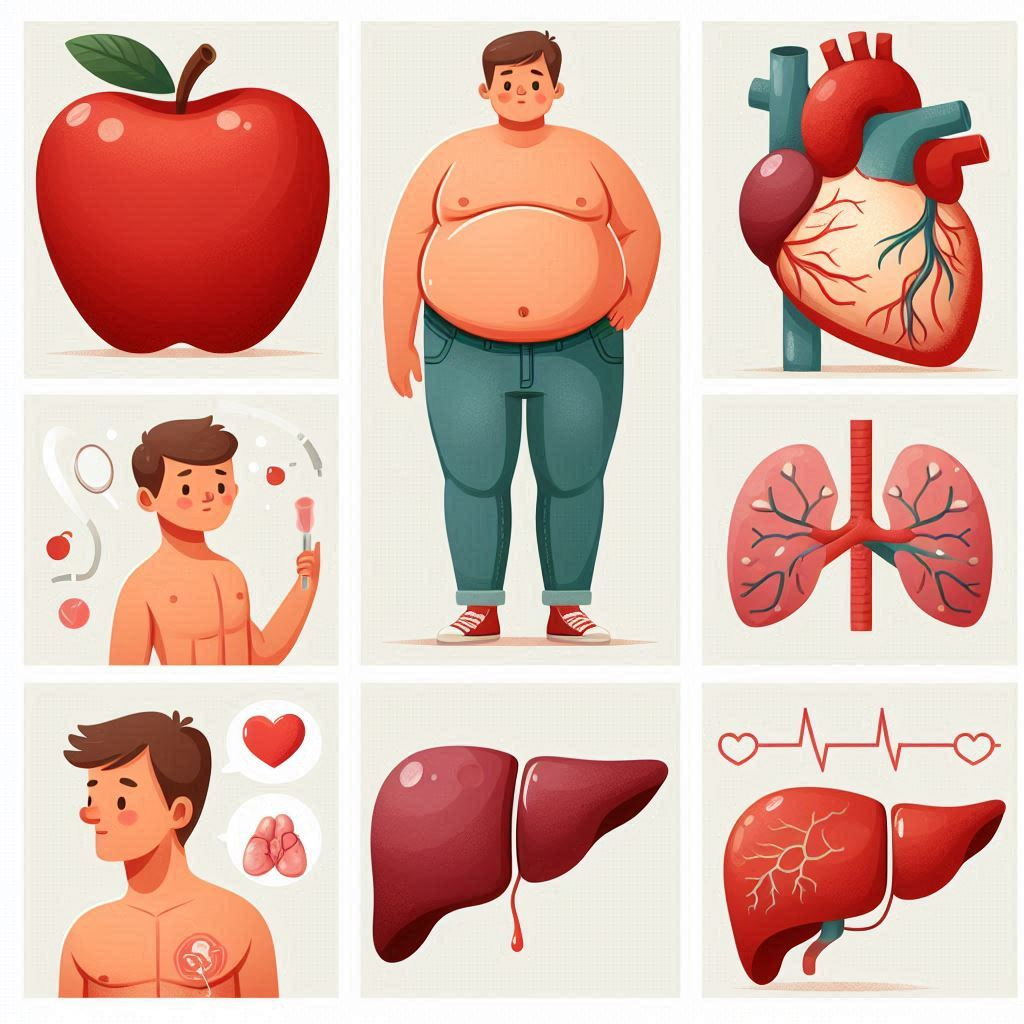

In [1]:
from IPython.display import Image
Image('obesité.jpg', width=600 , height=300)

# I-1. Exploration et prétraitement des données


# Importation des librairies et du dataset

In [2]:
import pandas as pd #pour créer un dataframe
import numpy as np #calcul des données
import matplotlib.pyplot as plt#visualisation des données
import seaborn as sns #visualisation des données avancées
import warnings# ne pas afficher les alertes 
warnings.filterwarnings('ignore')
from IPython.display import Image


In [3]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
dataset.shape

(2111, 17)

In [6]:
dataset.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# I.2. Description Statistique 

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [8]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
dataset.describe(include=['object'])

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [10]:
dataset['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
dataset['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [12]:
duplicates_rows = dataset[dataset.duplicated()]
duplicates_rows


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [13]:
duplicate_rows = dataset.duplicated().sum()
print(duplicate_rows)

24


In [14]:
dataset.drop_duplicates(inplace=True)

# I.3. Boxplot

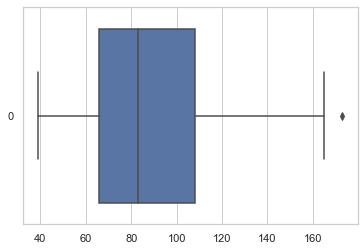

In [15]:
sns.set(style='whitegrid')
ax = sns.boxplot(data = dataset['Weight'], orient = 'h')

In [16]:
IQR = dataset['Weight'].quantile(0.75)-dataset['Weight'].quantile(0.25)
IQR

42.015907

In [17]:
Inf= dataset['Weight'].quantile(0.25)-1.5*IQR
#calcule une valeur inférieure dans la dataset qui est consodérée comme abérante  "weight"

In [18]:
Inf

2.976139500000002

In [19]:
dataset[dataset['Weight']<Inf].count()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [20]:
Sup = dataset['Weight'].quantile(0.75)+1.5*IQR
Sup

171.03976749999998

In [21]:
my_list = ['NObeyesdad','Weight']
my_list

#changement

['NObeyesdad', 'Weight']

In [22]:
dataset[my_list].head(20)


,NObeyesdad,Weight
0,Normal_Weight,64.0
1,Normal_Weight,56.0
2,Normal_Weight,77.0
3,Overweight_Level_I,87.0
4,Overweight_Level_II,89.8
5,Normal_Weight,53.0
6,Normal_Weight,55.0
7,Normal_Weight,53.0
8,Normal_Weight,64.0
9,Normal_Weight,68.0


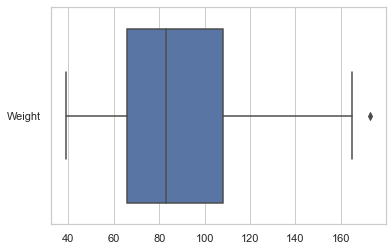

In [23]:
ax = sns.boxplot(data = dataset[my_list], orient = 'h')


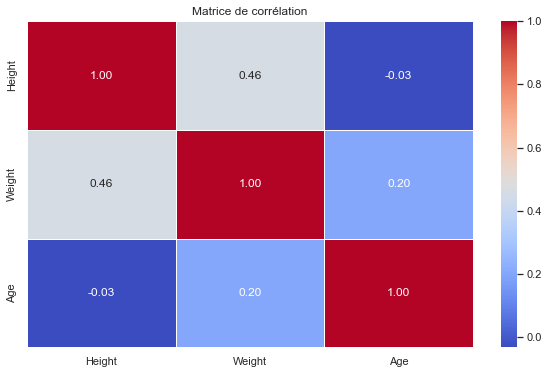

In [24]:
correlation = dataset[["Height", "Weight", "Age"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

Text(0.5, 0, 'MTRANS')

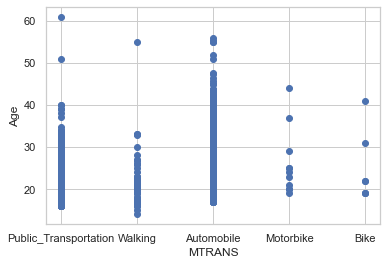

In [25]:
plt.scatter(x=dataset['MTRANS'],y=dataset['Age'])
plt.ylabel('Age')
plt.xlabel('MTRANS')

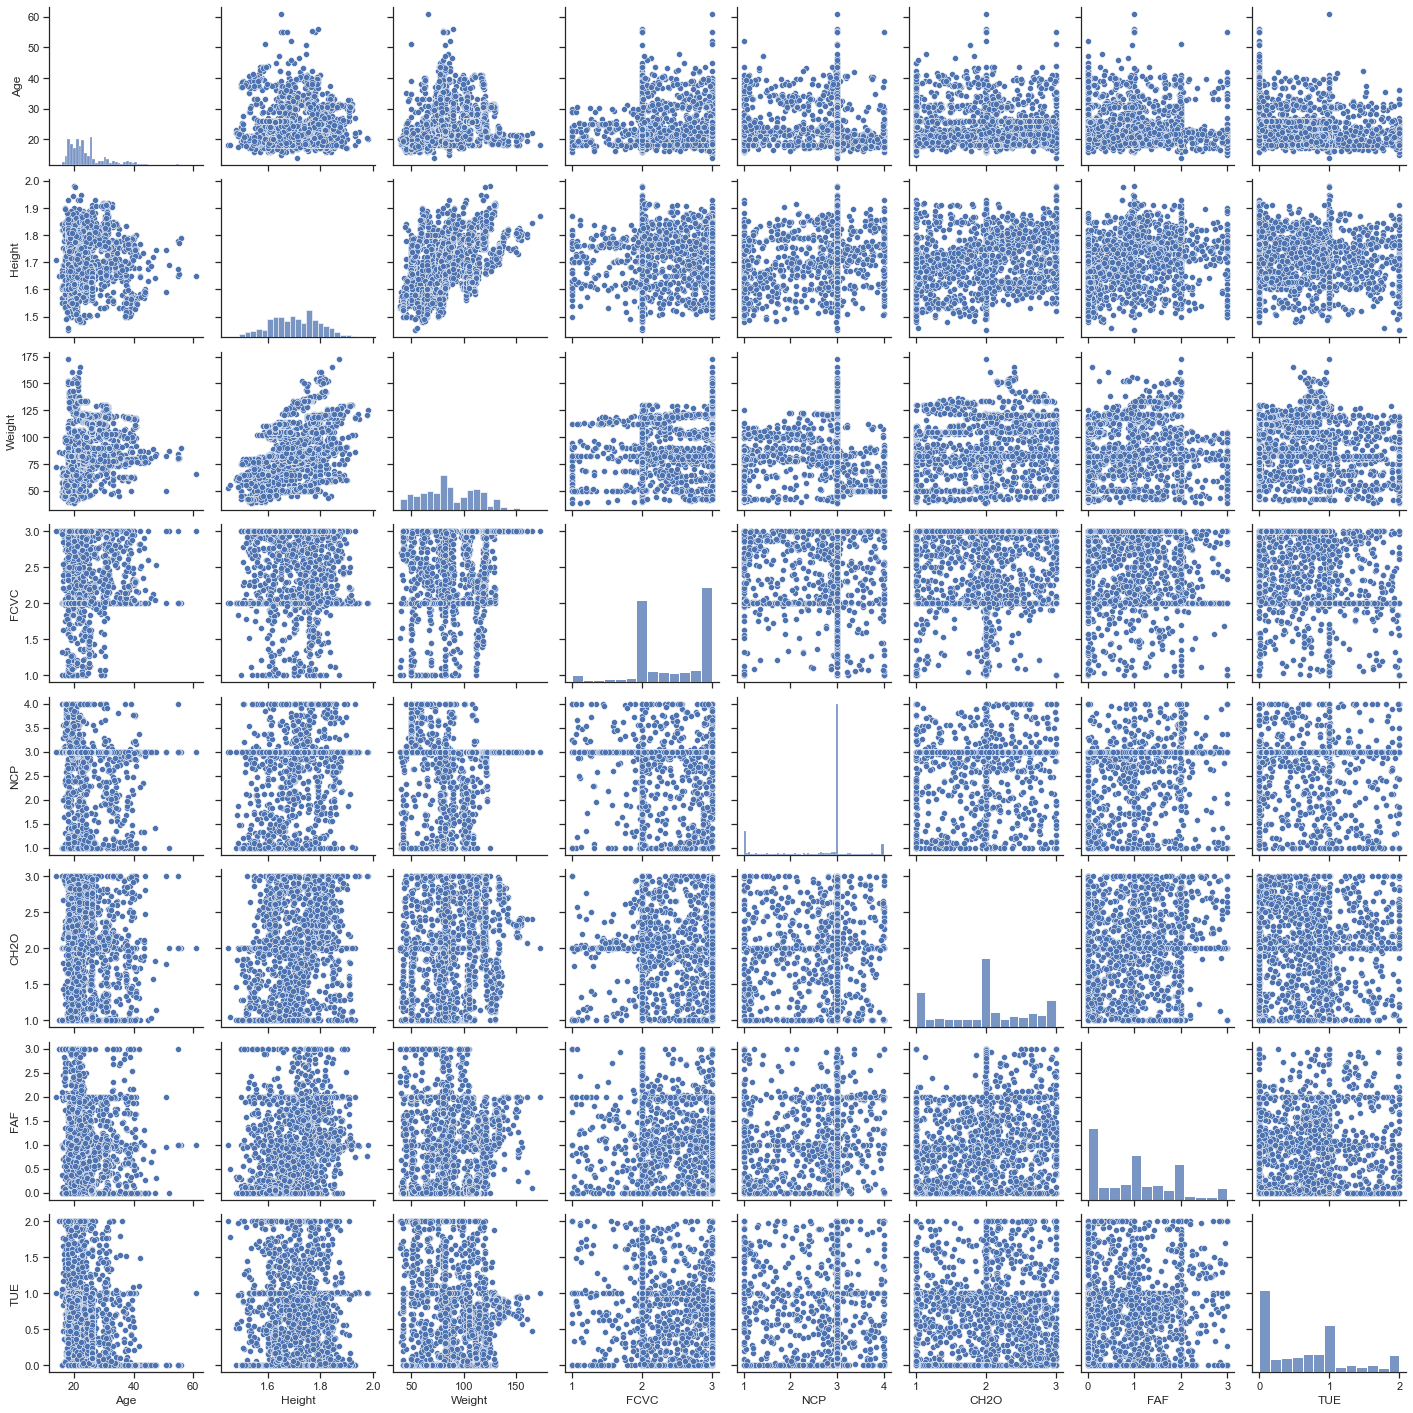

In [26]:
sns.set(style='ticks')
sns.pairplot(dataset)

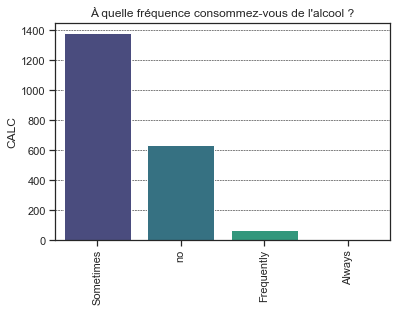

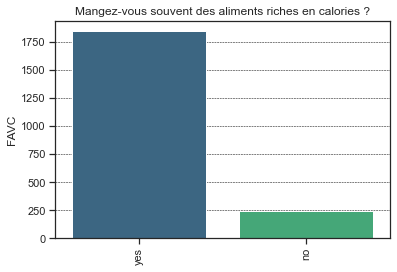

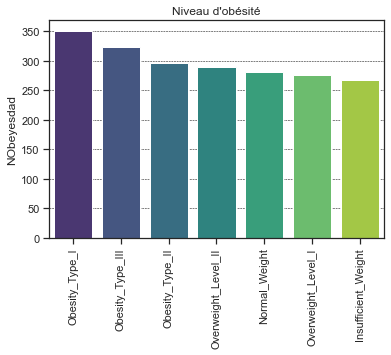

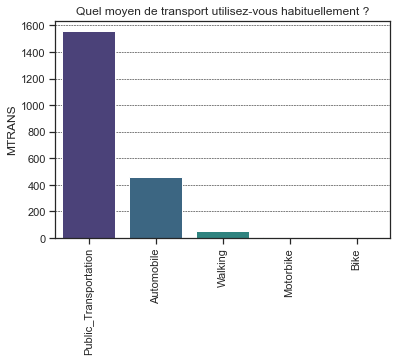

In [27]:
titles = ["À quelle fréquence consommez-vous de l'alcool ?","Mangez-vous souvent des aliments riches en calories ?","Niveau d'obésité","Quel moyen de transport utilisez-vous habituellement ?"]
count = 0
for column in ['CALC','FAVC', 'NObeyesdad', 'MTRANS']: 
    values = dataset[column].value_counts().iloc[:10]
    sns.barplot( x= values.index, y = values, palette='viridis')
   
    plt.xticks(rotation = 90)
    plt.grid(color='black', linestyle='--', linewidth=0.5, which ='both', axis='y')
    plt.title(titles[count])
    count += 1
    plt.show()

Text(0.5, 1.0, 'Pourcentage des sexes')

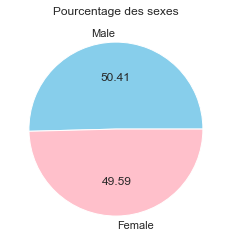

In [28]:
colors = ['skyblue', 'pink']

plt.pie(dataset['Gender'].value_counts(), labels= dataset['Gender'].value_counts().index, autopct=('%.2f'), colors = colors)
plt.title('Pourcentage des sexes')

Text(0.5, 1.0, 'Est-ce que les personnes qui fument boivent aussi ?')

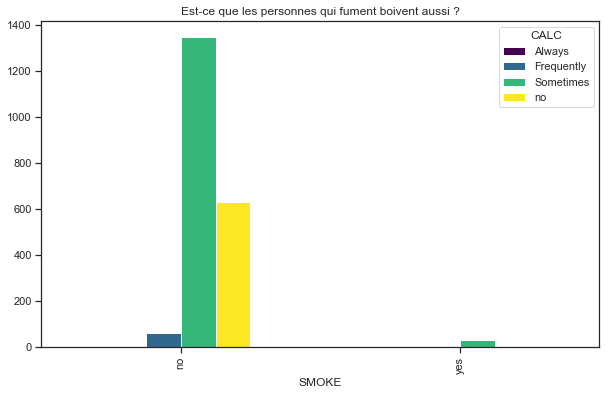

In [29]:
fumer = dataset.groupby('SMOKE')['CALC'].value_counts().unstack(fill_value=0)
fumer.plot(kind='bar', colormap='viridis', figsize=(10,6))
plt.title("Est-ce que les personnes qui fument boivent aussi ?")

Text(0.5, 1.0, 'Comparaison de la moyenne de poids par genre')

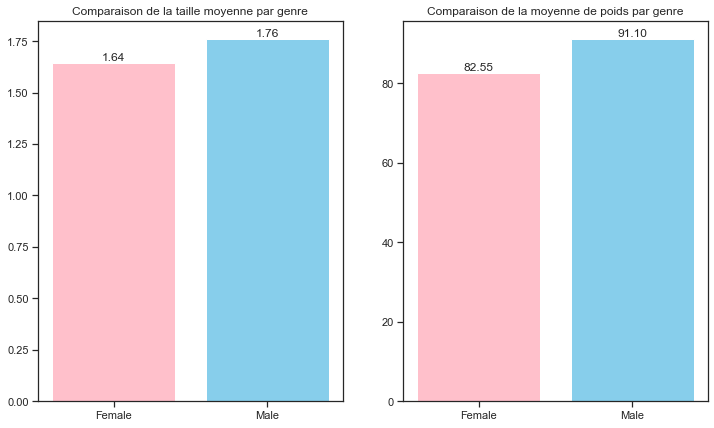

In [30]:
gender_height = dataset.groupby('Gender')['Height'].mean()
gender_weight = dataset.groupby('Gender')['Weight'].mean()
colors2=['pink','skyblue']
fig, ax = plt.subplots(1, 2, figsize=(12,7))

bar0 = ax[0].bar(x= gender_height.index, height = gender_height, color = colors2)
ax[0].bar_label(bar0, fmt='%.2f')
ax[0].set_title('Comparaison de la taille moyenne par genre')

bar1 = ax[1].bar(x= gender_weight.index, height = gender_weight, color = colors2)
ax[1].bar_label(bar1, fmt='%.2f')
ax[1].set_title('Comparaison de la moyenne de poids par genre')

Text(0.5, 1.0, "Niveau d'obésité des personnes qui consomment des aliments riches en calories")

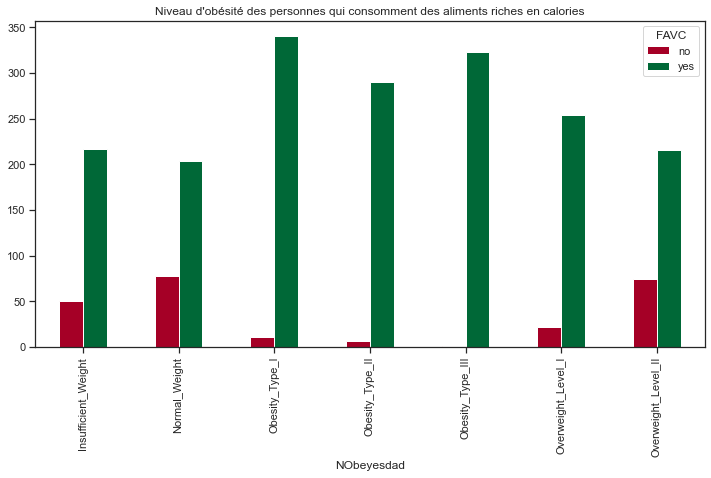

In [31]:
ob_caloric = dataset.groupby('NObeyesdad')['FAVC'].value_counts().unstack()

ob_caloric.plot(kind='bar', colormap='RdYlGn', figsize=(12, 6))
plt.title("Niveau d'obésité des personnes qui consomment des aliments riches en calories")

In [32]:
obj = dataset.select_dtypes(include = "object") .columns
print(obj)

from sklearn. preprocessing import LabelEncoder
le = LabelEncoder ()

for feat in obj:
     dataset[feat] = le.fit_transform(dataset[feat].astype(str))
print (dataset.info())

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int32  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int32  
 5   FAVC                            2087 non-null   int32  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int32  
 9   SMOKE                           2087 non-null   int32  
 10  CH2O       

In [33]:
dataset.head(10)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6
5,29.0,1,1.62,53.0,2,1,2.0,3.0,0,0,2.0,0,0.0,0.0,2,0,1
6,23.0,0,1.50,55.0,2,1,3.0,3.0,0,0,2.0,1,1.0,0.0,2,2,1
7,22.0,1,1.64,53.0,2,0,2.0,3.0,0,0,2.0,0,3.0,0.0,2,3,1
8,24.0,1,1.78,64.0,1,1,3.0,3.0,0,0,2.0,1,1.0,1.0,2,3,1
9,22.0,1,1.72,68.0,3,1,2.0,3.0,0,0,2.0,1,1.0,1.0,2,3,1


## I.4. Input variables and target

In [34]:
X = dataset.iloc[:,:16]
y = dataset.iloc[:,16]

In [35]:
X.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3
5,29.0,1,1.62,53.0,2,1,2.0,3.0,0,0,2.0,0,0.0,0.0,2,0
6,23.0,0,1.50,55.0,2,1,3.0,3.0,0,0,2.0,1,1.0,0.0,2,2
7,22.0,1,1.64,53.0,2,0,2.0,3.0,0,0,2.0,0,3.0,0.0,2,3
8,24.0,1,1.78,64.0,1,1,3.0,3.0,0,0,2.0,1,1.0,1.0,2,3
9,22.0,1,1.72,68.0,3,1,2.0,3.0,0,0,2.0,1,1.0,1.0,2,3


In [36]:
y.head(10)

0    1
1    1
2    1
3    5
4    6
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int32

In [37]:
type(X)

pandas.core.frame.DataFrame

In [38]:
#conversion du dataframe en numpy array

In [39]:
X = X.values
y = y.values

In [40]:
type(X)

numpy.ndarray

In [41]:
X[0:5,:]

array([[21.  ,  0.  ,  1.62, 64.  ,  3.  ,  0.  ,  2.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  1.  ,  0.  ,  1.  ,  2.  ,  3.  ],
       [21.  ,  0.  ,  1.52, 56.  ,  2.  ,  0.  ,  3.  ,  3.  ,  1.  ,
         1.  ,  3.  ,  1.  ,  3.  ,  0.  ,  2.  ,  3.  ],
       [23.  ,  1.  ,  1.8 , 77.  ,  1.  ,  0.  ,  2.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  1.  ,  2.  ,  1.  ,  2.  ,  3.  ],
       [27.  ,  1.  ,  1.8 , 87.  ,  1.  ,  0.  ,  3.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  0.  ,  2.  ,  0.  ,  2.  ,  4.  ],
       [22.  ,  1.  ,  1.78, 89.8 ,  2.  ,  0.  ,  2.  ,  1.  ,  0.  ,
         0.  ,  2.  ,  0.  ,  0.  ,  0.  ,  2.  ,  3.  ]])

In [42]:
features=['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']

<AxesSubplot:>

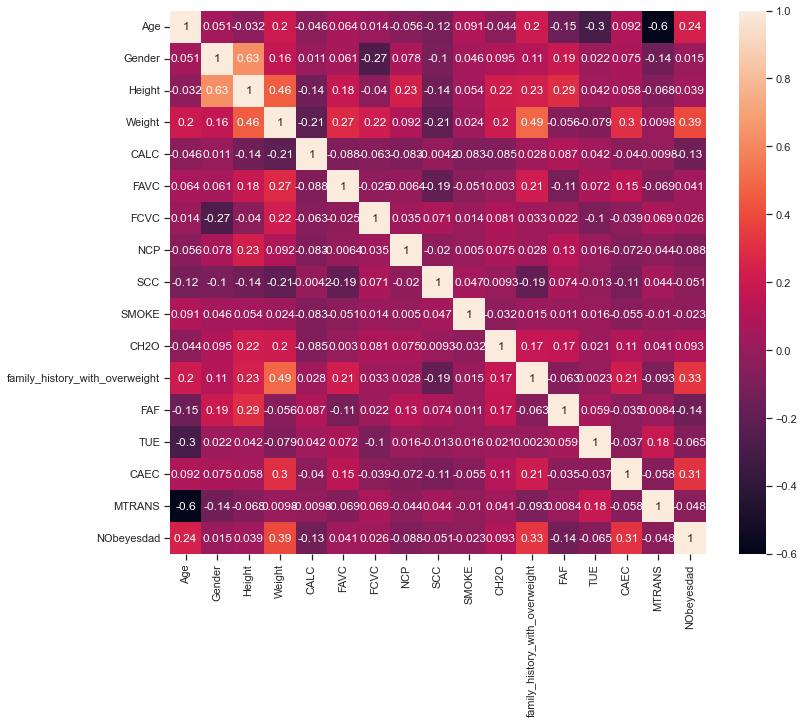

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), fmt='.2g', annot=True)

# 1.5 encodage des données catégorille

In [44]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [45]:
X[:,1] = label.fit_transform(X[:,1])
X[:,4] = label.fit_transform(X[:,4])
X[:,5] = label.fit_transform(X[:,5])
X[:,8] = label.fit_transform(X[:,8])
X[:,9] = label.fit_transform(X[:,9])

X[:,11] = label.fit_transform(X[:,11])
X[:,14] = label.fit_transform(X[:,14])
X[:,15] = label.fit_transform(X[:,15])
y[:,]=label.fit_transform(y[:,])
y[:,]=label.fit_transform(y[:,])

In [46]:
X[0:5,:]

array([[21.  ,  0.  ,  1.62, 64.  ,  3.  ,  0.  ,  2.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  1.  ,  0.  ,  1.  ,  2.  ,  3.  ],
       [21.  ,  0.  ,  1.52, 56.  ,  2.  ,  0.  ,  3.  ,  3.  ,  1.  ,
         1.  ,  3.  ,  1.  ,  3.  ,  0.  ,  2.  ,  3.  ],
       [23.  ,  1.  ,  1.8 , 77.  ,  1.  ,  0.  ,  2.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  1.  ,  2.  ,  1.  ,  2.  ,  3.  ],
       [27.  ,  1.  ,  1.8 , 87.  ,  1.  ,  0.  ,  3.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  0.  ,  2.  ,  0.  ,  2.  ,  4.  ],
       [22.  ,  1.  ,  1.78, 89.8 ,  2.  ,  0.  ,  2.  ,  1.  ,  0.  ,
         0.  ,  2.  ,  0.  ,  0.  ,  0.  ,  2.  ,  3.  ]])

In [47]:
y[0:20]

array([1, 1, 1, 5, 6, 1, 1, 1, 1, 1, 2, 6, 1, 2, 1, 1, 6, 2, 6, 5])

In [48]:
#Dummy encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [50]:
X.shape

(2087, 16)

In [51]:
ct = ColumnTransformer([('Gender',OneHotEncoder(),[1])],\
                      remainder = 'passthrough')

In [52]:
X = ct.fit_transform(X)

In [53]:
X.shape

(2087, 17)

In [54]:
X[0:5,:]

array([[ 1.  ,  0.  , 21.  ,  1.62, 64.  ,  3.  ,  0.  ,  2.  ,  3.  ,
         0.  ,  0.  ,  2.  ,  1.  ,  0.  ,  1.  ,  2.  ,  3.  ],
       [ 1.  ,  0.  , 21.  ,  1.52, 56.  ,  2.  ,  0.  ,  3.  ,  3.  ,
         1.  ,  1.  ,  3.  ,  1.  ,  3.  ,  0.  ,  2.  ,  3.  ],
       [ 0.  ,  1.  , 23.  ,  1.8 , 77.  ,  1.  ,  0.  ,  2.  ,  3.  ,
         0.  ,  0.  ,  2.  ,  1.  ,  2.  ,  1.  ,  2.  ,  3.  ],
       [ 0.  ,  1.  , 27.  ,  1.8 , 87.  ,  1.  ,  0.  ,  3.  ,  3.  ,
         0.  ,  0.  ,  2.  ,  0.  ,  2.  ,  0.  ,  2.  ,  4.  ],
       [ 0.  ,  1.  , 22.  ,  1.78, 89.8 ,  2.  ,  0.  ,  2.  ,  1.  ,
         0.  ,  0.  ,  2.  ,  0.  ,  0.  ,  0.  ,  2.  ,  3.  ]])

In [55]:
X = X[:,1:]

In [56]:
X.shape

(2087, 16)

In [57]:
X[0:5,:]

array([[ 0.  , 21.  ,  1.62, 64.  ,  3.  ,  0.  ,  2.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  1.  ,  0.  ,  1.  ,  2.  ,  3.  ],
       [ 0.  , 21.  ,  1.52, 56.  ,  2.  ,  0.  ,  3.  ,  3.  ,  1.  ,
         1.  ,  3.  ,  1.  ,  3.  ,  0.  ,  2.  ,  3.  ],
       [ 1.  , 23.  ,  1.8 , 77.  ,  1.  ,  0.  ,  2.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  1.  ,  2.  ,  1.  ,  2.  ,  3.  ],
       [ 1.  , 27.  ,  1.8 , 87.  ,  1.  ,  0.  ,  3.  ,  3.  ,  0.  ,
         0.  ,  2.  ,  0.  ,  2.  ,  0.  ,  2.  ,  4.  ],
       [ 1.  , 22.  ,  1.78, 89.8 ,  2.  ,  0.  ,  2.  ,  1.  ,  0.  ,
         0.  ,  2.  ,  0.  ,  0.  ,  0.  ,  2.  ,  3.  ]])

In [58]:
dataset.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [59]:
features = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS']

In [60]:
features

['Age',
 'Gender',
 'Height',
 'Weight',
 'CALC',
 'FAVC',
 'FCVC',
 'NCP',
 'SCC',
 'SMOKE',
 'CH2O',
 'family_history_with_overweight',
 'FAF',
 'TUE',
 'CAEC',
 'MTRANS']

In [61]:
#splitting dataset

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,\
                                                random_state=0)

In [63]:
X_train.shape

(1669, 16)

In [64]:
X_test.shape

(418, 16)

In [65]:
y.mean()

3.0143747005270725

In [66]:
print(y_train.mean())
print(y_test.mean())

2.995805871779509
3.088516746411483


In [67]:
#normalisation des données de train 

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
X_train[0,:]

array([  0.      ,  19.297004,   1.817271, 141.917802,   2.      ,
         1.      ,   3.      ,   3.      ,   0.      ,   0.      ,
         2.699675,   1.      ,   1.520818,   0.76399 ,   2.      ,
         3.      ])

In [72]:
X_train_sc[0,:]

array([-0.99700867, -0.77818551,  1.26372276,  2.11277113, -0.5098968 ,
        0.35521942,  1.06592847,  0.39830493, -0.22876388, -0.13757005,
        1.12990622,  0.46240478,  0.60661379,  0.15958362,  0.32714307,
        0.49683024])

In [73]:
( 141.917802- X_train[:,].mean())/(X_train[:,].std())
####

6.072952549219418

In [74]:
print(y_train)
print(type(y_train))

[4 4 1 ... 5 5 3]
<class 'numpy.ndarray'>


# II- Knn


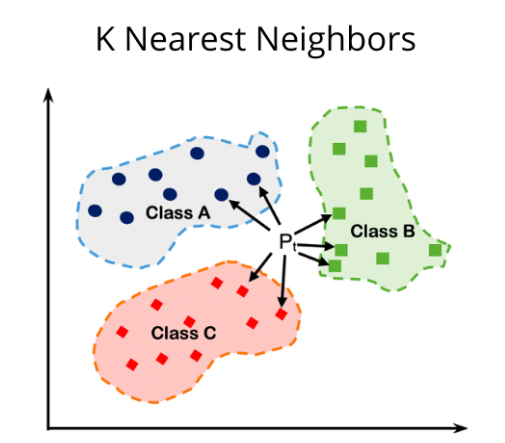

In [75]:
Image('knn.png')

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

In [77]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=6)

In [78]:
y_pred_knn = knn.predict(X_test_sc)

In [79]:
for i in range(15):
    print(y_test[i], y_pred_knn[i])

3 3
1 1
6 6
3 3
2 2
1 6
3 3
4 4
1 0
6 1
1 6
6 0
6 6
2 2
2 2


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
from sklearn.metrics import precision_score, recall_score
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print('Recall knn:', recall_knn)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
print('Precision knn:', precision_knn)

Accuracy knn 0.8349282296650717
Recall knn: 0.826437531534353
Precision knn: 0.8270960152778885


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.93      0.80        46
           1       0.68      0.51      0.58        51
           2       0.86      0.87      0.86        75
           3       0.89      0.96      0.92        70
           4       0.98      1.00      0.99        60
           5       0.91      0.75      0.82        56
           6       0.77      0.77      0.77        60

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.84      0.83      0.83       418



# III-1:  Arbre de decison avec "Entropy"

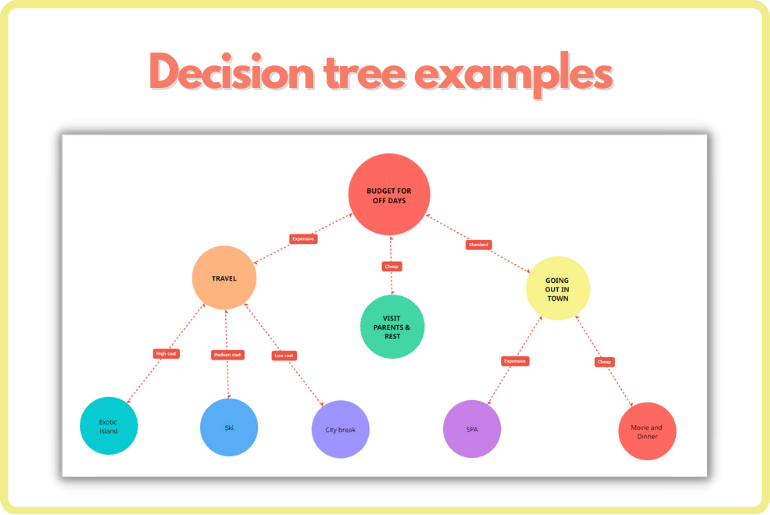

In [83]:
Image('Decision-tree.png', width=500 , height=400)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth = 5)
model.fit(dataset,y)

DecisionTreeClassifier(max_depth=5)

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy") #instanciation lel model . 

In [86]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
y_pred_dt = dt.predict(X_test)

In [88]:
for i in range(20):
    print(y_test[i],y_pred_dt[i])

3 3
1 1
6 6
3 3
2 2
1 1
3 3
4 4
1 1
6 6
1 1
6 6
6 6
2 2
2 2
5 1
5 5
5 5
4 4
3 3


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9497607655502392')

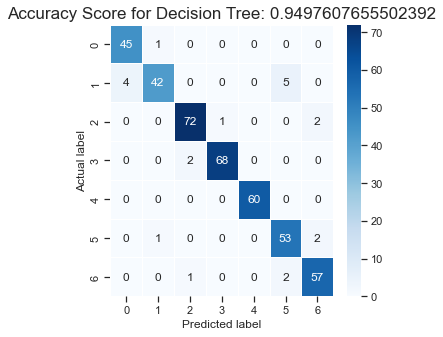

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 17)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy dt:', accuracy_dt)

recall_dt = recall_score(y_test, y_pred_dt, average='macro')
print('Recall dt:', recall_dt)

precision_dt = precision_score(y_test, y_pred_dt, average='macro')
print('Precision dt:', precision_dt)

Accuracy dt: 0.9497607655502392
Recall dt: 0.9470924891695809
Precision dt: 0.9480256586717958


In [91]:
from sklearn.metrics import classification_report
report_dt = classification_report(y_test, y_pred_dt)
print('Classification Report:\n', report_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.95      0.82      0.88        51
           2       0.96      0.96      0.96        75
           3       0.99      0.97      0.98        70
           4       1.00      1.00      1.00        60
           5       0.88      0.95      0.91        56
           6       0.93      0.95      0.94        60

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [92]:
!pip install graphviz

In [93]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [94]:
tree.export_graphviz(model,feature_names = features,\
                    out_file = 'treee.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

In [95]:
Image('treee.png')

# III-2 : Arbre decision avec "Gini"

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth = 5)
model.fit(dataset,y)




DecisionTreeClassifier(max_depth=5)

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion="gini") #instanciation lel model . 
dt2.fit(X_train,y_train)
y_pred_dt = dt2.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9497607655502392')

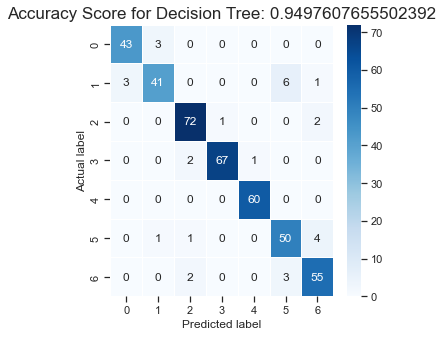

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 17)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy dt:', accuracy_dt)

recall_dt = recall_score(y_test, y_pred_dt, average='macro')
print('Recall dt:', recall_dt)

precision_dt = precision_score(y_test, y_pred_dt, average='macro')
print('Precision dt:', precision_dt)


from sklearn.metrics import classification_report

report_dt = classification_report(y_test, y_pred_dt)
print('Classification Report:\n', report_dt)


Accuracy dt: 0.9282296650717703
Recall dt: 0.9236244062842529
Precision dt: 0.9263448187439999
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.91      0.80      0.85        51
           2       0.94      0.96      0.95        75
           3       0.99      0.96      0.97        70
           4       0.98      1.00      0.99        60
           5       0.85      0.89      0.87        56
           6       0.89      0.92      0.90        60

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



# IV - Random Forest


In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [102]:
y_pred_rf = rf.predict(X_test)

In [103]:
print('Accuracy rf', accuracy_score(y_test,y_pred_rf))

recall_rf = recall_score(y_test, y_pred_rf, average='macro')
print('Recall rf:', recall_rf)

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
print('Precision rf:', precision_rf)

Accuracy rf 0.9641148325358851
Recall rf: 0.9637751622388085
Precision rf: 0.9628584371727441


In [104]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.86      0.96      0.91        51
           2       1.00      0.95      0.97        75
           3       0.99      1.00      0.99        70
           4       1.00      1.00      1.00        60
           5       0.94      0.91      0.93        56
           6       0.95      0.95      0.95        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.97      0.96      0.96       418



# V- Feature selection 

In [105]:
importances = rf.feature_importances_

In [106]:
importances

array([0.05811245, 0.09128211, 0.10007369, 0.34959212, 0.02852857,
       0.01647744, 0.08835607, 0.05081118, 0.00691596, 0.00180797,
       0.04303018, 0.02755432, 0.04266981, 0.04608352, 0.03097818,
       0.01772645])

In [107]:
sorted_idx = np.argsort(importances)

In [108]:
features_arr = np.asarray(features)

Text(0.5, 1.0, 'Variable importance')

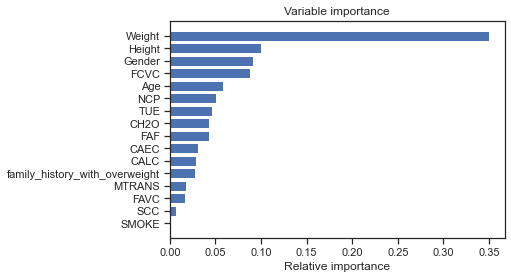

In [109]:
padding=np.arange(X_train_sc.size/len(X_train_sc))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')

# VI. Support vector Machine

In [110]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [111]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)

print(confusion_matrix(y_test,y_predictSVM_l))

print('Accuracy linear SVM', accuracy_score(y_test,y_predictSVM_l))

recall_rf = recall_score(y_test, y_predictSVM_l, average='macro')
print('Recall linear SVM:', recall_rf)

precision_rf = precision_score(y_test, y_predictSVM_l, average='macro')
print('Precision linear SVM:', precision_rf)


[[46  0  0  0  0  0  0]
 [ 2 45  0  0  0  4  0]
 [ 0  0 69  2  0  0  4]
 [ 0  0  0 70  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  1  1  0  0 53  1]
 [ 0  0  0  0  0  2 58]]
Accuracy linear SVM 0.9593301435406698
Recall linear SVM: 0.9593497398959584
Precision linear SVM: 0.9590672451736776


In [112]:
print(classification_report(y_test,y_predictSVM_l))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       0.98      0.88      0.93        51
           2       0.99      0.92      0.95        75
           3       0.97      1.00      0.99        70
           4       1.00      1.00      1.00        60
           5       0.90      0.95      0.92        56
           6       0.92      0.97      0.94        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [113]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)

SVC()

In [114]:
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM', accuracy_score(y_test,y_predictSVM_k))

recall_rf = recall_score(y_test, y_predictSVM_k, average='macro')
print('Recall rbf SVM:', recall_rf)

precision_rf = precision_score(y_test, y_predictSVM_k, average='macro')
print('Precision rbf SVM:', precision_rf)

[[42  4  0  0  0  0  0]
 [ 3 42  0  0  0  1  5]
 [ 0  5 67  1  0  2  0]
 [ 0  1  0 69  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  7  0  0  0 47  2]
 [ 0  5  4  0  0  4 47]]
Accuracy rbf SVM 0.8947368421052632
Recall rbf SVM: 0.8911770795274631
Precision rbf SVM: 0.8942429045170494


In [115]:
print(classification_report(y_test,y_predictSVM_k))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.66      0.82      0.73        51
           2       0.94      0.89      0.92        75
           3       0.99      0.99      0.99        70
           4       1.00      1.00      1.00        60
           5       0.87      0.84      0.85        56
           6       0.87      0.78      0.82        60

    accuracy                           0.89       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.89      0.90       418



# VII.  Logistic Regression 

In [116]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
regpred = reg.predict(X_test)


In [117]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        46
           1       0.55      0.47      0.51        51
           2       0.46      0.51      0.48        75
           3       0.78      0.86      0.82        70
           4       0.88      1.00      0.94        60
           5       0.55      0.50      0.52        56
           6       0.39      0.30      0.34        60

    accuracy                           0.64       418
   macro avg       0.62      0.64      0.63       418
weighted avg       0.62      0.64      0.63       418

Accuracy of Logistic Regression is :  63.63636363636363


In [118]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.9880382775119617
Mean Squared Error :  3.4808612440191387
Root Mean Squared Error :  1.8657066339644983
R2 Score :  0.03879494956040186


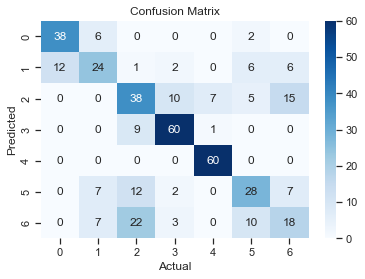

In [119]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# VIII. KMeans Clustering

In [120]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaler)

In [122]:
print(pca.explained_variance_ratio_)

[0.16295348 0.11737868 0.096553   0.08514084 0.07015597 0.06333973
 0.0606014  0.05439768 0.05173865 0.04925272 0.04852097 0.04287101
 0.03760449 0.02529862 0.02057643 0.01361633]


In [123]:
print(sum(pca.explained_variance_ratio_[:17]))

0.9999999999999998


In [124]:
X_pca.shape

(2087, 16)

In [125]:
from sklearn.cluster import KMeans

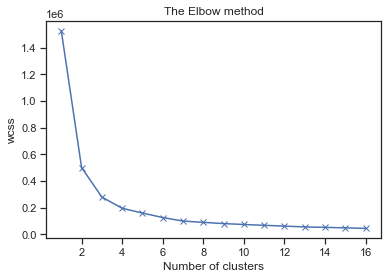

In [126]:
wcss=[]
for k in range(1,17):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1,17), wcss, 'bx-')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [127]:
!pip install --upgrade kneed

In [128]:
from kneed import KneeLocator
k = KneeLocator(range(1, 17), wcss, curve="convex", direction="decreasing")
k.elbow

3

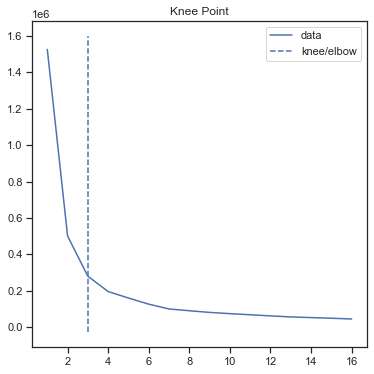

In [129]:
k.plot_knee()
plt.show()

In [130]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.labels_

In [131]:
y_kmeans


array([1, 1, 2, ..., 0, 0, 0])

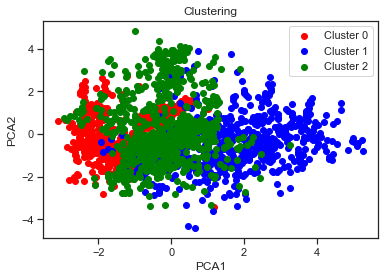

In [132]:
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='green',label='Cluster 2')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

In [133]:
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans2.fit(X_scaler)
y_kmeans_sc = kmeans2.labels_

In [134]:
y_kmeans_sc

array([1, 1, 2, ..., 2, 2, 2])

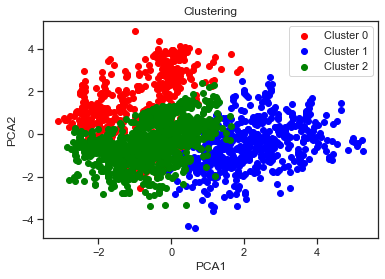

In [135]:
plt.scatter(X_pca[y_kmeans_sc==0,0],X_pca[y_kmeans_sc==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans_sc==1,0],X_pca[y_kmeans_sc==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans_sc==2,0],X_pca[y_kmeans_sc==2,1],c='green',label='Cluster 2')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

# IX. Profiling

In [136]:
kmeans2.cluster_centers_.shape

(3, 16)

In [137]:
dataset.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [138]:
col_names = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS']

In [139]:
cluster_centers = pd.DataFrame(data = kmeans2.cluster_centers_, columns = col_names)
cluster_centers

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.316128,1.262028,0.177581,0.019903,0.016768,0.129714,-0.140593,0.054067,-0.143811,0.011088,-0.067368,0.257439,0.002040,-0.343655,0.179917,-1.819778
1,-0.483257,-0.566890,-0.654462,-1.108726,0.240657,-0.735957,-0.031257,-0.006139,0.594316,0.066604,-0.354543,-1.102936,0.135535,0.152879,-0.786968,0.421968
2,0.100399,-0.231884,0.234267,0.507098,-0.118343,0.290895,0.069678,-0.018362,-0.219584,-0.035282,0.191086,0.411212,-0.063745,0.063834,0.294888,0.518020


In [140]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = col_names)
cluster_centers

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.662132,32.388770,1.719218,87.379885,2.278912,0.925170,2.346304,2.742509,1.587302e-02,0.022676,1.963780,0.922902,1.014553,0.454091,1.936508,0.056689
1,0.262452,20.743547,1.641702,57.827214,2.394636,0.647510,2.404756,2.696486,1.704981e-01,0.030651,1.789138,0.406130,1.128460,0.755987,1.492337,2.892720
2,0.554270,22.876618,1.724499,100.136862,2.209075,0.976868,2.458716,2.687143,-1.804112e-16,0.016014,2.120956,0.981317,0.958421,0.701847,1.989324,3.014235


In [141]:
dataset.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,0.504073,1.702674,86.858730,2.270244,0.883565,2.421466,2.701179,0.045999,0.021083,2.004749,0.825108,1.012812,0.663035,1.853857,2.358888,3.014375
std,6.368801,0.500103,0.093186,26.190847,0.517008,0.320823,0.534737,0.764614,0.209533,0.143695,0.608284,0.379966,0.853475,0.608153,0.459494,1.265402,1.948470
min,14.000000,0.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.915937,0.000000,1.630178,66.000000,2.000000,1.000000,2.000000,2.697467,0.000000,0.000000,1.590922,1.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,22.847618,1.000000,1.701584,83.101100,2.000000,1.000000,2.396265,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.630866,2.000000,3.000000,3.000000
75%,26.000000,1.000000,1.769491,108.015907,3.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.466193,1.000000,1.678102,1.000000,2.000000,3.000000,5.000000
max,61.000000,1.000000,1.980000,173.000000,3.000000,1.000000,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [142]:
dataset_cluster = pd.concat([dataset, pd.DataFrame({'Cluster': y_kmeans_sc})], axis=1)
dataset_cluster.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Cluster
0,21.0,0.0,1.62,64.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0
1,21.0,0.0,1.52,56.0,2.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0,1.0
2,23.0,1.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0
3,27.0,1.0,1.80,87.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0,5.0,1.0
4,22.0,1.0,1.78,89.8,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6.0,1.0
5,29.0,1.0,1.62,53.0,2.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
6,23.0,0.0,1.50,55.0,2.0,1.0,3.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
7,22.0,1.0,1.64,53.0,2.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,3.0,0.0,2.0,3.0,1.0,1.0
8,24.0,1.0,1.78,64.0,1.0,1.0,3.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0
9,22.0,1.0,1.72,68.0,3.0,1.0,2.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0


In [143]:
Xc = dataset_cluster.iloc[:,1:16].values
yc = dataset_cluster.iloc[:,17].values

In [144]:
#import graphviz
#from sklearn import tree
#from sklearn.tree import export_graphviz, DecisionTreeClassifier
#model = DecisionTreeClassifier(max_depth = 5)
#model.fit(Xc,yc)

In [145]:
#tree.export_graphviz(model,feature_names = col_names,\
 #                   out_file = 'ktree.dot',\
  #                  label = 'all',\
   #                 filled = True,\
    #                rounded = True)

In [146]:
#Image('ktree.png')

Text(0, 0.5, 'Euclidean Distance')

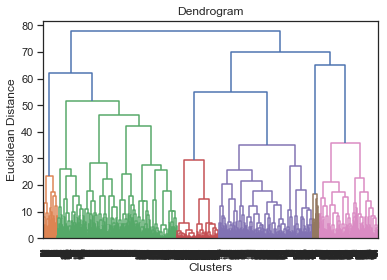

In [147]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')  


In [148]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hc.fit(X_scaler)
y_hc = hc.labels_ 

In [149]:
y_hc 

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

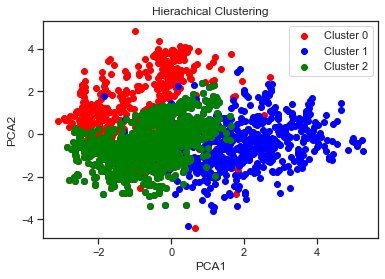

In [150]:
plt.scatter(X_pca[y_hc==0,0],X_pca[y_hc==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_hc==1,0],X_pca[y_hc==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans_sc==2,0],X_pca[y_kmeans_sc==2,1],c='green',label='Cluster 2')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierachical Clustering')
plt.legend()
plt.show()

In [151]:
from sklearn.metrics import silhouette_score

In [152]:
cluster_range = range(2,9)
random_range = range(0,5)

silhouette=[]       

for i in cluster_range: 
    for j in random_range:  
        cluster=KMeans(n_clusters=i, random_state=j)
        cluster.fit(X_scaler)
        cluster_labels= cluster.labels_
        silhouette_avg= silhouette_score(X_scaler,cluster_labels)
        print("For n_clusters=",i,"and seed=",j, "silhouette avg:", silhouette_avg )
        silhouette.append([i,j,silhouette_avg])

For n_clusters= 2 and seed= 0 silhouette avg: 0.19271885372967484
For n_clusters= 2 and seed= 1 silhouette avg: 0.19271885372967484
For n_clusters= 2 and seed= 2 silhouette avg: 0.1925744045907468
For n_clusters= 2 and seed= 3 silhouette avg: 0.19285942157966632
For n_clusters= 2 and seed= 4 silhouette avg: 0.19221760295981322
For n_clusters= 3 and seed= 0 silhouette avg: 0.14617791937311106
For n_clusters= 3 and seed= 1 silhouette avg: 0.14604459018757926
For n_clusters= 3 and seed= 2 silhouette avg: 0.14604459018757926
For n_clusters= 3 and seed= 3 silhouette avg: 0.14604459018757926
For n_clusters= 3 and seed= 4 silhouette avg: 0.14604459018757926
For n_clusters= 4 and seed= 0 silhouette avg: 0.11144283378493647
For n_clusters= 4 and seed= 1 silhouette avg: 0.11143443160554395
For n_clusters= 4 and seed= 2 silhouette avg: 0.11143443160554395
For n_clusters= 4 and seed= 3 silhouette avg: 0.11645674310996584
For n_clusters= 4 and seed= 4 silhouette avg: 0.11134111917264641
For n_clust

In [153]:
silhouette=pd.DataFrame(silhouette,columns=["n_clusters","seed","silhouette_score"])
silhouette

,n_clusters,seed,silhouette_score
0,2,0,0.192719
1,2,1,0.192719
2,2,2,0.192574
3,2,3,0.192859
4,2,4,0.192218
5,3,0,0.146178
6,3,1,0.146045
7,3,2,0.146045
8,3,3,0.146045
9,3,4,0.146045


In [154]:
pivot_silhouette=pd.pivot_table(silhouette,index="n_clusters",columns="seed",values="silhouette_score")
pivot_silhouette

seed,0,1,2,3,4
n_clusters,,,,,
2,0.192719,0.192719,0.192574,0.192859,0.192218
3,0.146178,0.146045,0.146045,0.146045,0.146045
4,0.111443,0.111434,0.111434,0.116457,0.111341
5,0.122461,0.126195,0.125540,0.116713,0.125947
6,0.139847,0.139767,0.133259,0.137861,0.139767
7,0.152738,0.143781,0.135572,0.149988,0.149704
8,0.151643,0.162649,0.153841,0.162670,0.150426


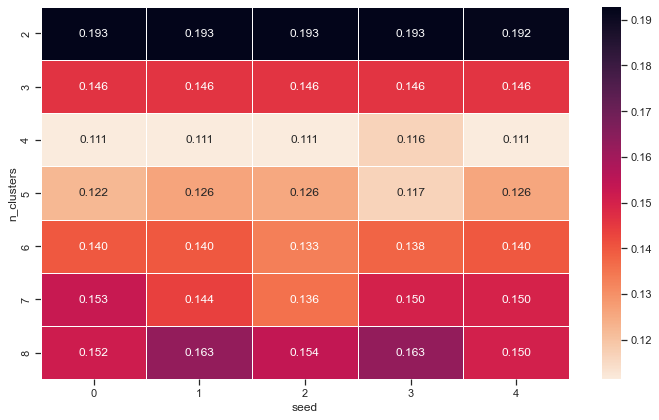

In [155]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_silhouette, annot=True, linewidths=.5, fmt='.3f',cmap=sns.cm.rocket_r )
plt.tight_layout()
plt.show()  


# X. Résumé


| Algorithm       | Accuracy     |Recall | Precision |
| :------------- | -----------|-----------|-----------:|
|   kNN  | 0.8349282296650717   |0.826437531534353  | 0.8270960152778885 |
| Decision Tree 'Entropy'  | 0.9473684210526315  | 0.9442913687214016  |0.9458059505618858 |
| Decision Tree 'Geni'  | 0.9354066985645934  | 0.9307332498216677 | 0.9329157102333326 |
| Random Forest |0.9641148325358851 | 0.9625743340814586 | 0.9630413169320489 |


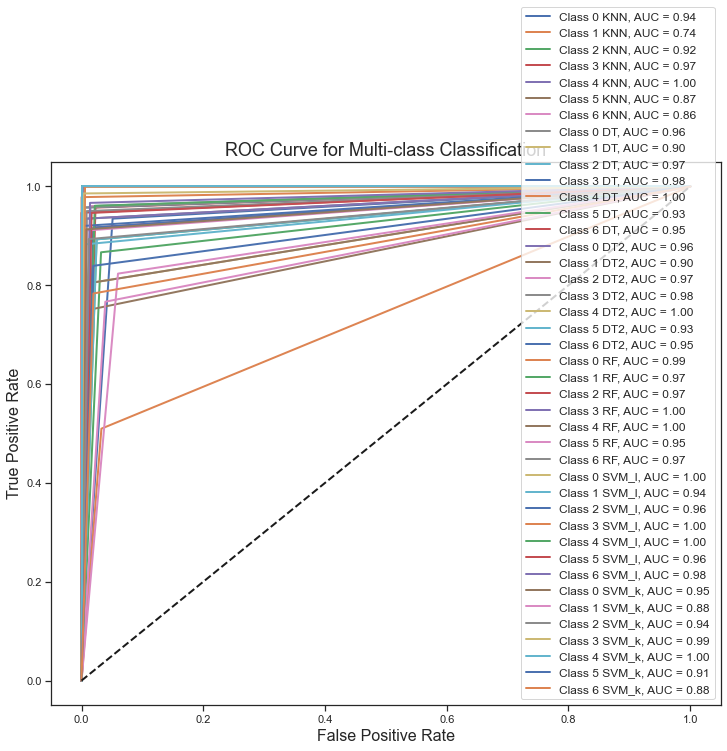

In [156]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

n_classes = len(set(y_test))

y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_pred_knn_bin = label_binarize(y_pred_knn, classes=range(n_classes))
y_pred_dt_bin = label_binarize(y_pred_dt, classes=range(n_classes))
y_pred_dt2_bin = label_binarize(y_pred_dt, classes=range(n_classes))
y_pred_rf_bin = label_binarize(y_pred_rf, classes=range(n_classes))
y_predictSVM_l_bin = label_binarize(y_predictSVM_l, classes=range(n_classes))
y_predictSVM_k_bin = label_binarize(y_predictSVM_k, classes=range(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

classifiers = {
    'KNN': y_pred_knn_bin,
    'DT': y_pred_dt_bin,
    'DT2': y_pred_dt2_bin,
    'RF': y_pred_rf_bin,
    'SVM_l': y_predictSVM_l_bin,
    'SVM_k': y_predictSVM_k_bin,
}

plt.figure(figsize=(12, 10))  

for classifier_name, y_pred_bin in classifiers.items():
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} {classifier_name}, AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for Multi-class Classification', fontsize=18)

plt.legend(loc='lower right', fontsize=12)

plt.show()


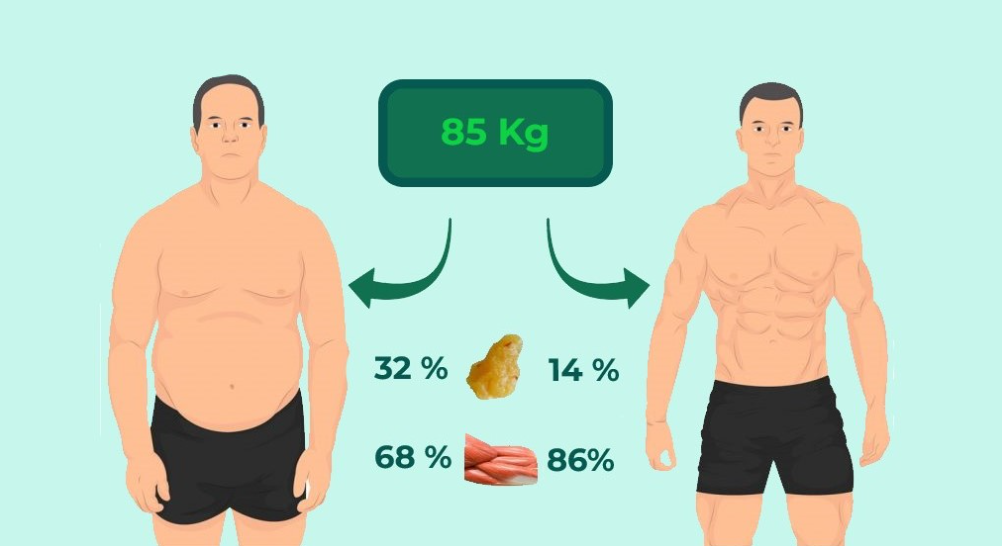

In [157]:
from IPython.display import Image
Image('ob1.png', width=900 , height=200)

                                             Merci pour votre attention ! 